In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [2]:
db = pd.read_csv('../Spam_URL_Detection/data-set/spam_URL.csv') 

In [3]:
db

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
148298,"https://cdn.substack.com/image/fetch/f_auto,q_...",True
148299,https://numlock.substack.com/subscribe,True
148300,https://docs.google.com/forms/d/e/1FAIpQLSfDLO...,True
148301,https://bookclub.substack.com/,True


In [4]:
db.shape

(148303, 2)

In [5]:
db.describe()

,url,is_spam
count,148303,148303
unique,87581,2
top,https://www.bloomberg.com/tosv2.html,False
freq,1086,101021


In [6]:
db.groupby(db['is_spam']).size() #total records=148,303. Not Spam= 101,021  spam=47,282 

is_spam
False    101021
True      47282
dtype: int64

In [7]:
db['is_spam'] = db.is_spam.apply(str)  # Convert boolean column to string column

In [8]:
db['is_spam'] = db['is_spam'].apply(lambda x : 1 if x == "True" in x else 0)

In [9]:
db

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1
...,...,...
148298,"https://cdn.substack.com/image/fetch/f_auto,q_...",1
148299,https://numlock.substack.com/subscribe,1
148300,https://docs.google.com/forms/d/e/1FAIpQLSfDLO...,1
148301,https://bookclub.substack.com/,1


In [10]:
ifSpam = db['url']

In [12]:
db = url.iloc[:,0]

NameError: name 'url' is not defined

In [64]:
db.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [65]:
ifSpam = url.iloc[:,1]

NameError: name 'url' is not defined

In [66]:
ifSpam.head()

0    https://briefingday.us8.list-manage.com/unsubs...
1                               https://www.hvper.com/
2                   https://briefingday.com/m/v4n3i4f3
3     https://briefingday.com/n/20200618/m#commentform
4                          https://briefingday.com/fan
Name: url, dtype: object

In [67]:
def extractUrl(data):
    url = str(data)
    extractSlash = url.split('/')
    result = []
    
    for i in extractSlash:
        extractDash = str(i).split('-')
        dotExtract = []
        
        for j in range(0,len(extractDash)):
            extractDot = str(extractDash[j]).split('.')
            dotExtract += extractDot
            
        result += extractDash + dotExtract
    result = list(set(result))

    return result


In [68]:
example = "http://www.emrahyldrm-1234.net"
a = extractUrl(example)
print(a)

['', 'www', '1234.net', 'www.emrahyldrm', 'emrahyldrm', 'net', '1234', 'http:']


In [69]:
db_train, db_test, ifSpam_train, ifSpam_test = train_test_split(db, ifSpam, test_size=0.25)

In [72]:
cv = CountVectorizer(tokenizer=extractUrl) #CV=to transform a corpora of text to a vector of term / token counts

In [73]:
features = cv.fit_transform(db_train)

In [74]:
features_test = cv.transform(db_test)

In [32]:
#Predicts 

In [78]:
dtModel = tree.DecisionTreeClassifier() 

In [76]:
dtModel.fit(features, ifSpam_train)

ValueError: Number of labels=111227 does not match number of samples=2

In [77]:
dtPredict = dtModel.predict(features_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [36]:
lsvcModel = LinearSVC()

In [37]:
lsvcModel.fit(features, ifSpam_train)

LinearSVC()

In [38]:
lsvcPredict = lsvcModel.predict(features_test)

In [39]:
sgdcModel = SGDClassifier()

In [40]:
sgdcModel.fit(features, ifSpam_train) 

SGDClassifier()

In [41]:
sgdcPredict = sgdcModel.predict(features_test)

In [42]:
nbModel = MultinomialNB()

In [43]:
nbModel.fit(features, ifSpam_train)

MultinomialNB()

In [44]:
nbPredict = nbModel.predict(features_test)

In [45]:
# Visualization

In [65]:
from sklearn.metrics 
import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

SyntaxError: invalid syntax (3652352975.py, line 1)

In [50]:
def visualization(model):
    predict = model.predict(features_test)
    plot_confusion_matrix(model,features_test,ifSpam_test)
    plot_precision_recall_curve(model,features_test,ifSpam_test)
    plot_roc_curve(model,features_test,ifSpam_test)

In [51]:
#Results

In [6]:
print("Number of mislabeled out of a total of %d test entries: %d" % (db_test.shape[0], 
                                                                      (ifSpam_test != dtPredict).sum()))

NameError: name 'db_test' is not defined

In [4]:
successRate = 100.0 * f1_score(ifSpam_test, dtPredict, average='micro')

NameError: name 'ifSpam_test' is not defined

In [5]:
accuracy = successRate
print(f"Final Accuracy: {accuracy:.2f}%")

NameError: name 'successRate' is not defined

In [55]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Decision Tree")

The Success Rate was calculated as % : 98.77279102384293 with Decision Tree


In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [69]:
import matplotlib.pyplot as plt

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

def visualization(model):
    predict = model.predict(features_test)

    ConfusionMatrixDisplay.from_estimator(model, features_test, ifSpam_test)
    PrecisionRecallDisplay.from_estimator(model, features_test, ifSpam_test)
    RocCurveDisplay.from_estimator(model, features_test, ifSpam_test)

    plt.show()

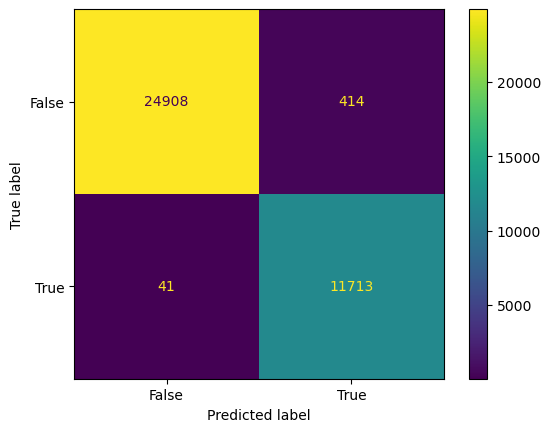

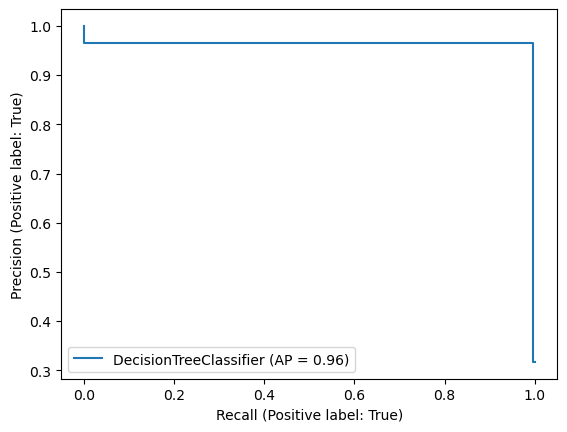

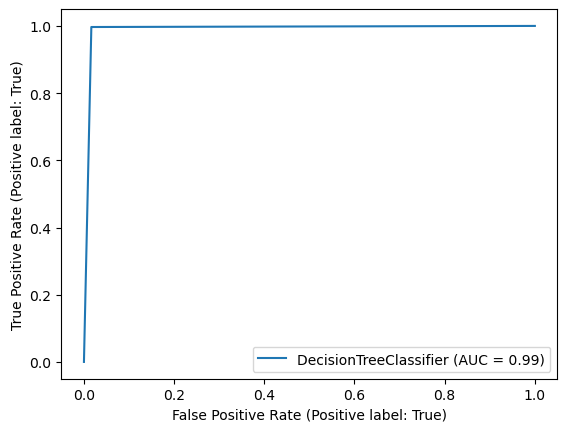

In [72]:
visualization(dtModel)


In [73]:
#Linear Support Vector

In [75]:
print("Number of mislabeled out of a total of %d test entries: %d" %  (db_test.shape[0], 
                                                                       (ifSpam_test != lsvcPredict).sum()))

Number of mislabeled out of a total of 37076 test entries: 536


In [76]:
successRate = 100.0 * f1_score(ifSpam_test, lsvcPredict, average='micro')

In [77]:
print("The Success Rate was calculated as % : " + str(successRate) + " with LinearSVC")

The Success Rate was calculated as % : 98.55432085446111 with LinearSVC


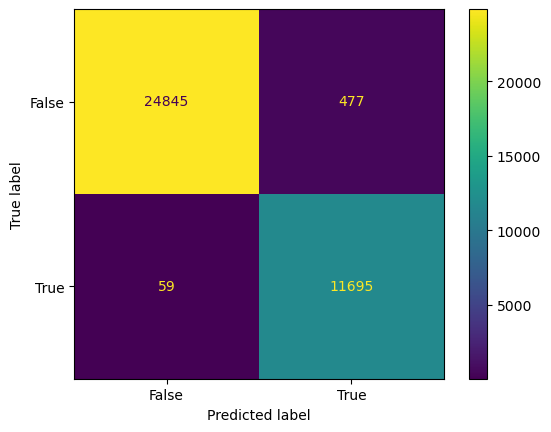

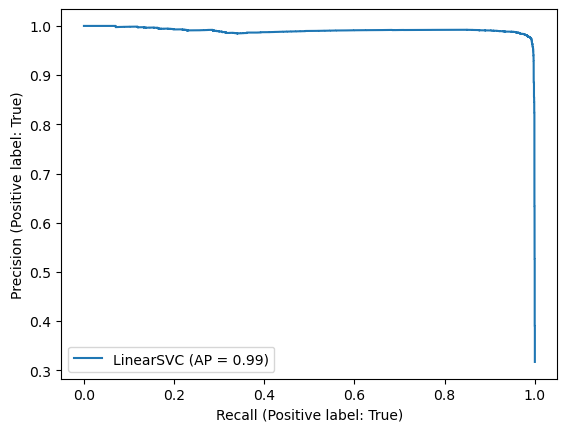

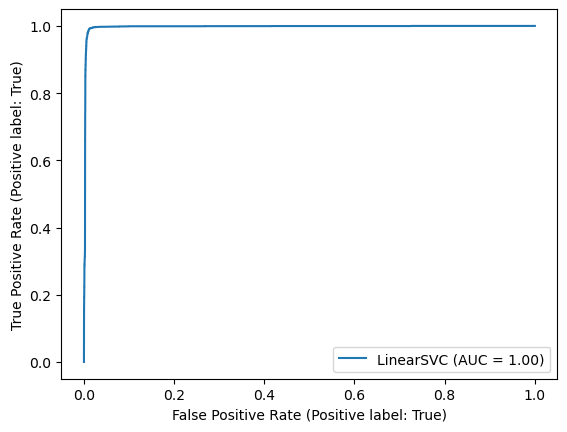

In [78]:
visualization(lsvcModel)

In [81]:
#Stochastic Gradient Descent

In [83]:
print("Number of mislabeled out of a total of %d test entries: %d" %  (db_test.shape[0], 
                                                                       (ifSpam_test != sgdcPredict).sum()))

Number of mislabeled out of a total of 37076 test entries: 1677


In [84]:
successRate = 100.0 * f1_score(ifSpam_test, sgdcPredict, average='micro')

In [85]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Stochastic Gradient Descent")

The Success Rate was calculated as % : 95.47685834502104 with Stochastic Gradient Descent


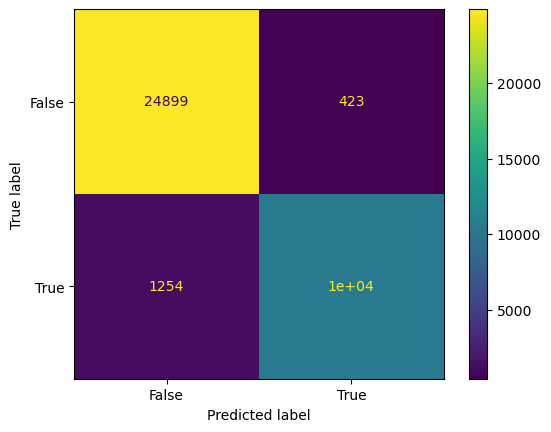

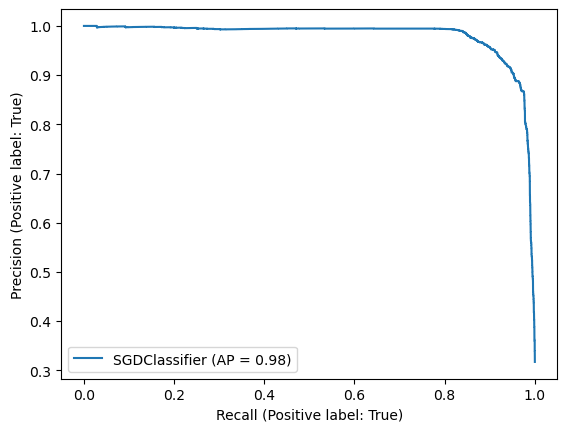

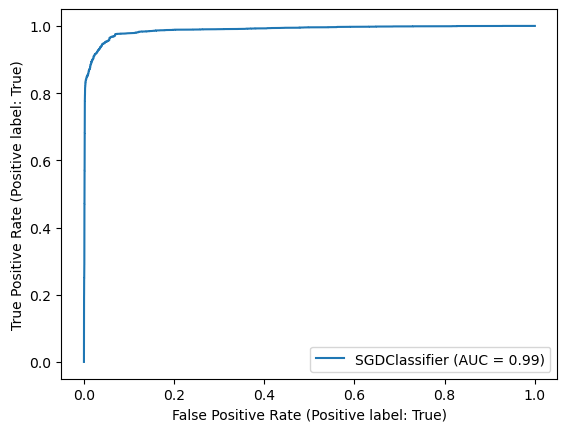

In [86]:
visualization(sgdcModel)

In [88]:
#Multinomial Naive Bayes

In [89]:
print("Number of mislabeled out of a total of %d test entries: %d" % (db_test.shape[0], 
                                                                      (ifSpam_test != nbPredict).sum()))

Number of mislabeled out of a total of 37076 test entries: 3339


In [90]:
successRate = 100.0 * f1_score(ifSpam_test, nbPredict, average='micro')

In [91]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Multinomial Naive Bayes")

The Success Rate was calculated as % : 90.99417412881648 with Multinomial Naive Bayes


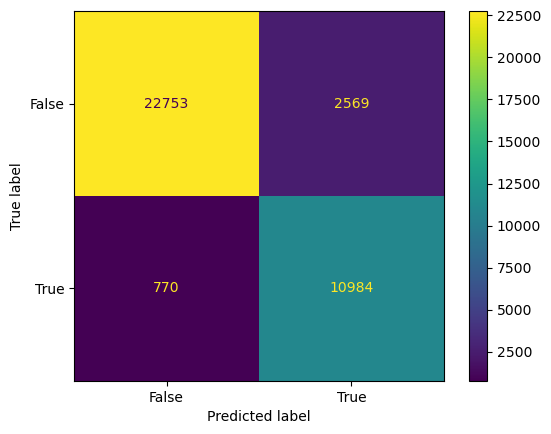

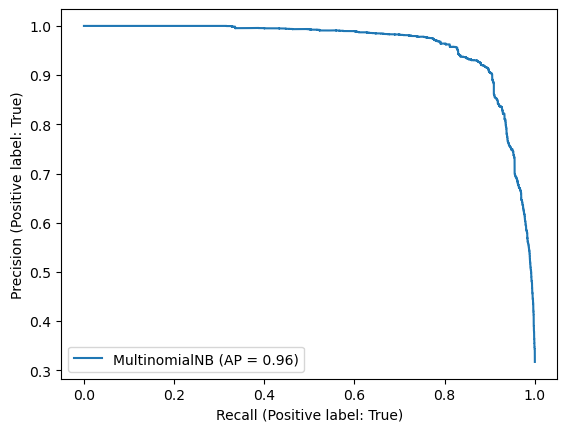

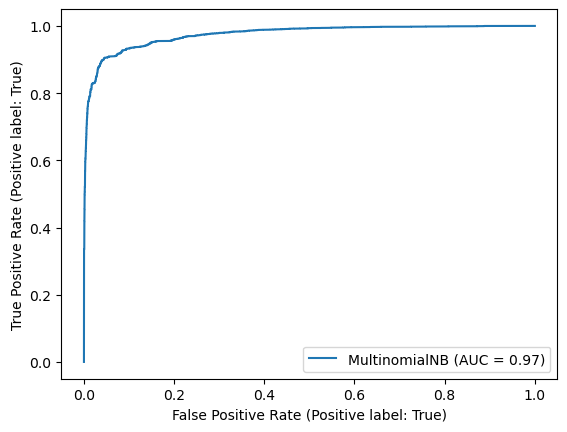

In [92]:
visualization(nbModel)

In [2]:
y_test = test_labels
y_pred = model.predict(X_test)


NameError: name 'test_labels' is not defined

In [1]:
from sklearn.metrics import confusion_matrix

# Replace these with your actual labels
# y_test = actual labels
# y_pred = predicted labels from your classifier
# Example:
# y_test = [...]
# y_pred = [...]

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Unpack the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate accuracy
final_accuracy = (TP + TN) / (TP + TN + FP + FN)

# Display final accuracy
print("Confusion Matrix:")
print(cm)
print(f"\nFinal Accuracy: {final_accuracy * 100:.2f}%")


NameError: name 'y_test' is not defined